<a href="https://colab.research.google.com/github/Polliferraz/on34-python-s07-banco-de-dados-I/blob/main/Bicho_vicio_resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ON34 Python S07 Banco de dados I - Exercicio de aula

Esse documento tem como objetivo passar passo a passo de um exercício que deverá ser feito durante a aula de Bando de dados I.

## Bicho é meu Vicio

Você, como arquiteta de banco de dados, recebeu um novo cliente, o "Bicho é meu Vicio" que precisa urgentemente de uma arquitetura de seus dados.

O negócio da empresa é prestar os serviços de banho, corte e adestramento para todo o tipo de animal, mas especializado em aves, mamiferos, répiteis e peixes. Em seus resgistros, gostariam de guardar informações sobre os seus clientes humanoides e não humanóides e qual e quando aconteceu um atendimento deles na loja.

Com isso, esperam entender melhor seu fluxo de vendas, quais os serviços mais demandados e os tipos de bichos que mais os procuram.

### Desafio 1

Criar 3 ou mais entidades de tabelas, seus campos e atributos.

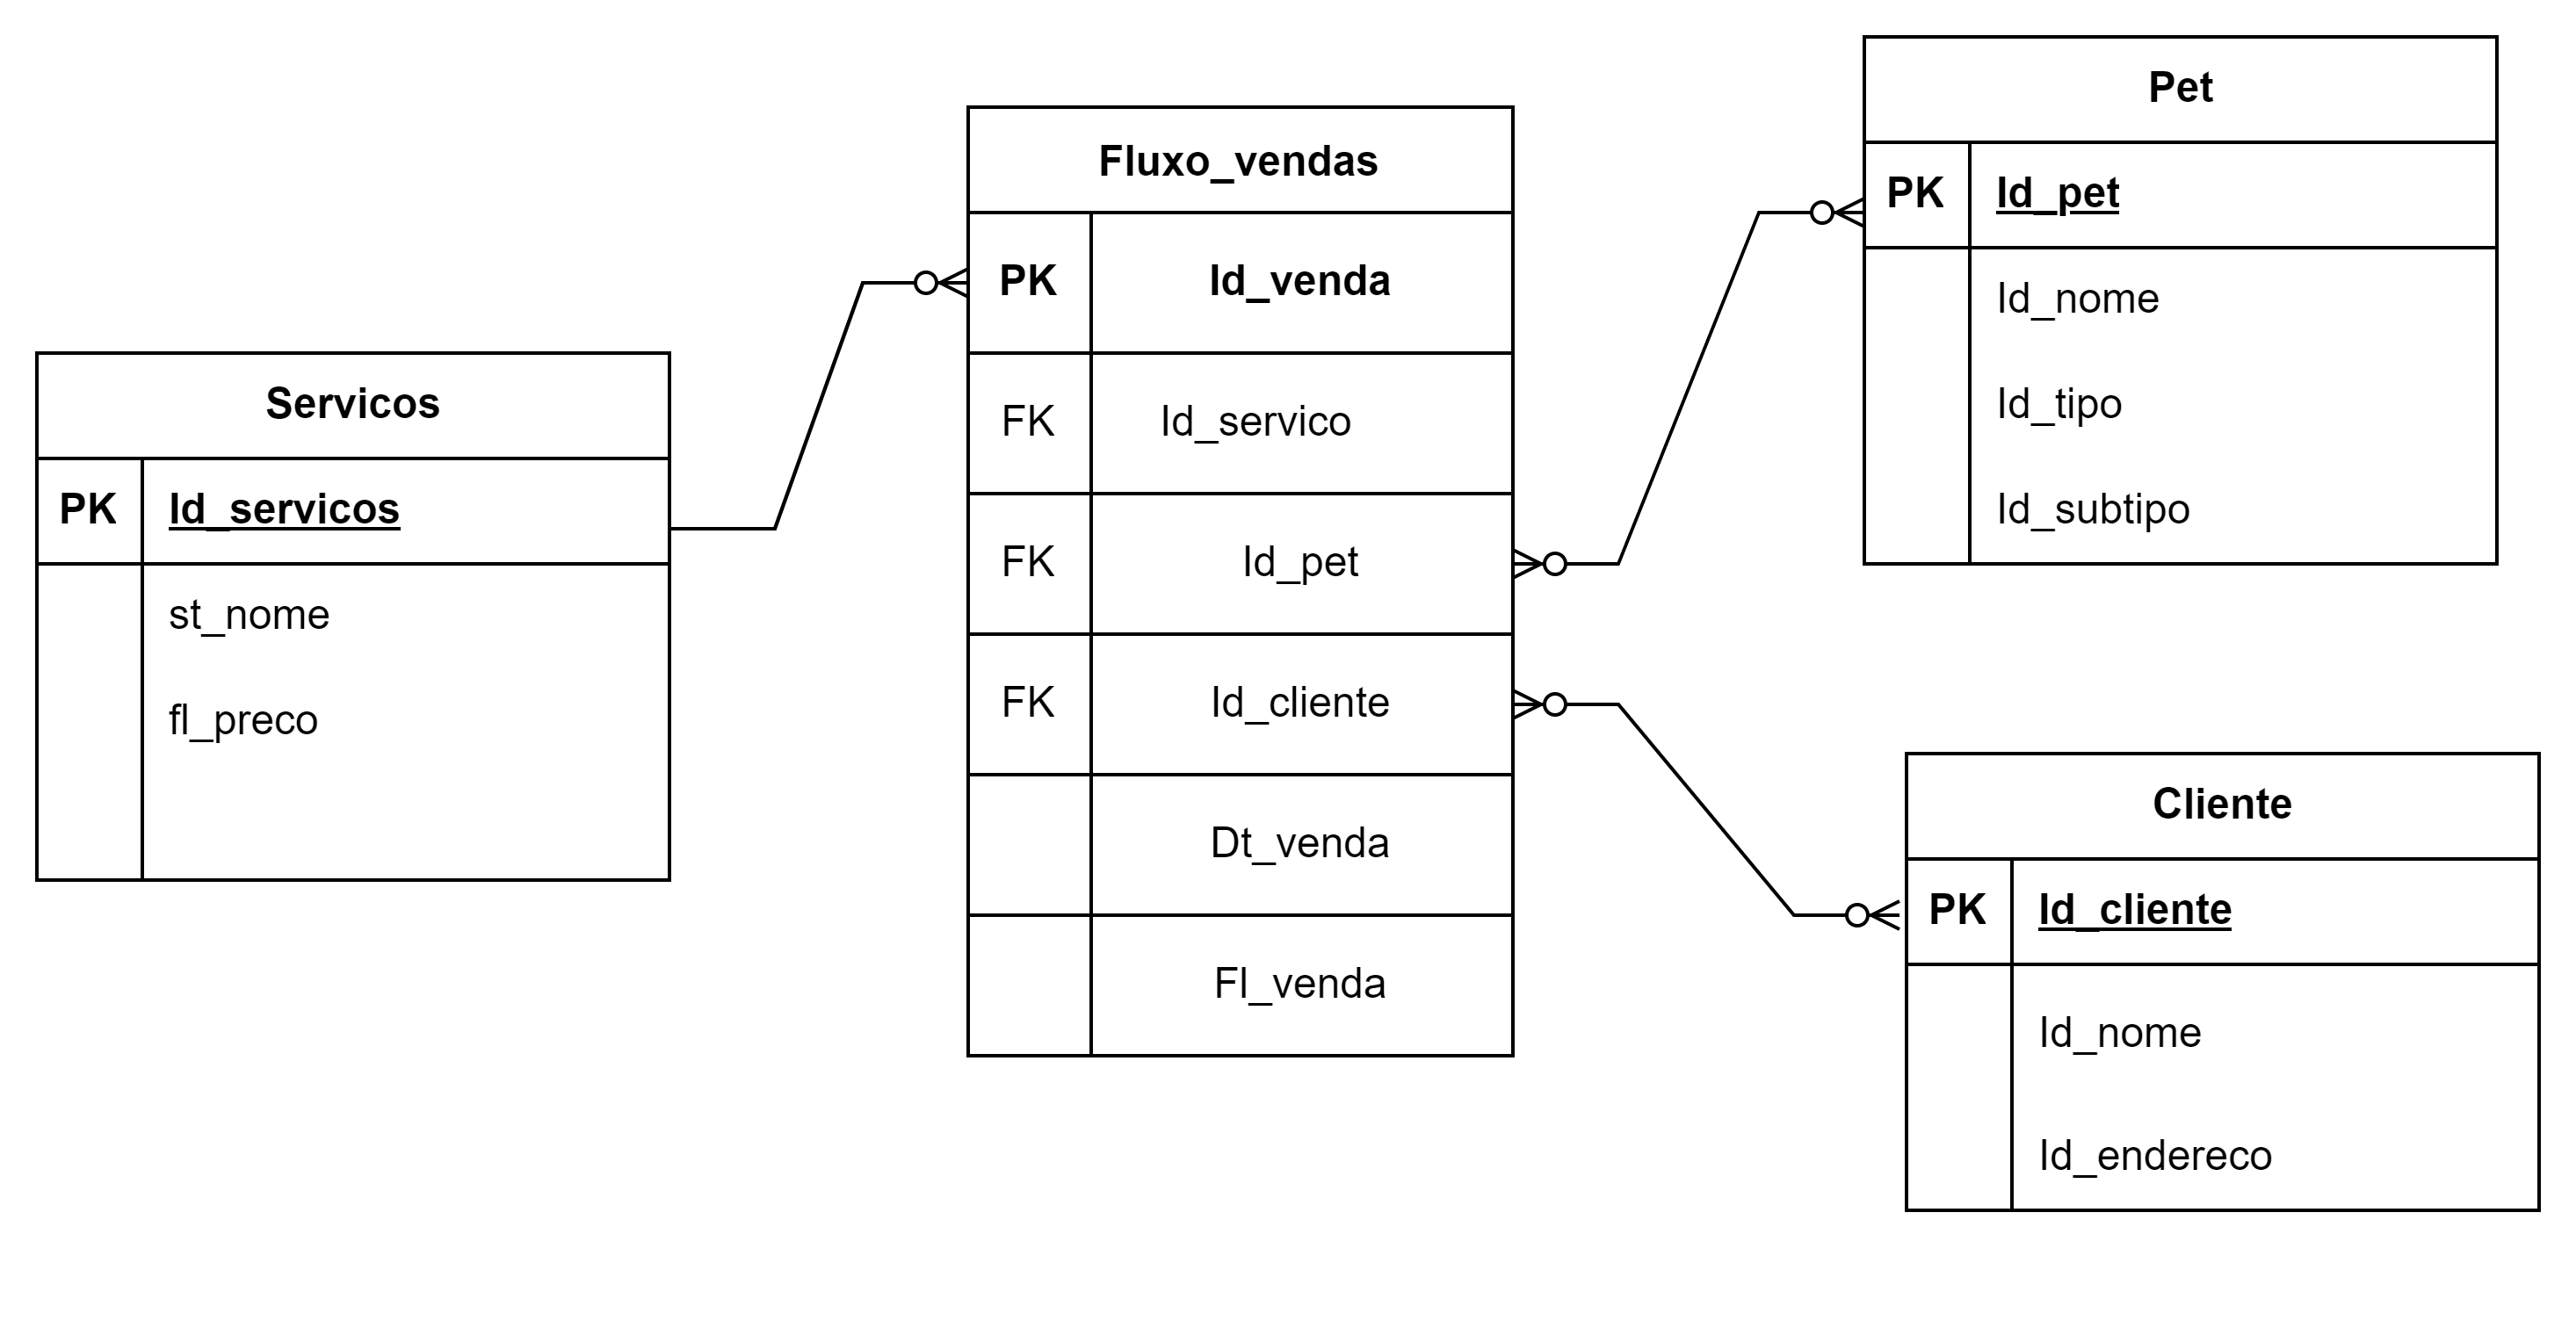

Resposta esperada: Um desenho de tabelas e suas relações, indicação de qual modelo de estrutura escolheu.

Para viabilizar a resolução dos próximos desafios preciso importar a biblioteca [biblioteca SQLite](https://docs.python.org/3/library/sqlite3.html), criar um banco de dados (de acordo com o diagrama previamente construído) e realizar conexão com este.

### Inicializando a biblioteca

Para se inicializar a biblioteca, deve-se:


In [1]:
# Importar a biblioteca
import sqlite3


#Criar uma conexão com um banco de dados (no nosso caso, não temos um arquivo de banco de dados pré feito, então decidiu-se inicializar um banco de dados
# denominado bichos_vicio.db).
conn = sqlite3.connect("bicho_vicio.db")

# Criar um cursor no banco que permitirá o uso de comandos no formato SQL
cur  = conn.cursor()

*   Criar as tabelas, observando tipos dos campos e dos suas naturezas.

### Criando tabelas isoladas (Sem chave estrangeira)

Para se criar tabelas isoladas, deve-se:



In [ ]:
''' A princípio criei as tabelas todas juntas ( primárias e e estrangeiras) até onde rodei tinha funcionado, mas depois percebi a instrução de criar separadas
 e segui, mas de fato faz diferença?'''

# Criando a tabela servicos
cur.execute("""
CREATE TABLE servicos(
  id_servico TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL,
  fl_preco REAL NOT NULL
)
""")

# Criando a tabela pet
cur.execute("""
CREATE TABLE pet(
  id_pet TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL,
  st_tipo TEXT NOT NULL,
  st_subtipo TEXT NOT NULL
)
""")

# Criando a tabela clientes
cur.execute("""
CREATE TABLE cliente(
  id_cliente TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL,
  st_endereco TEXT NOT NULL
)
""")

### Criando tabela fato (Com chave estrangeira)

Para se criar a tabela fato, deve-se:

In [2]:

# Criando a tabela Fluxo de venda
cur.execute("""
CREATE TABLE fluxo_vendas(
  id_venda TEXT NOT NULL PRIMARY KEY,
  id_servico TEXT NOT NULL,
  Id_pet TEXT NOT NULL,
  id_cliente TEXT NOT NULL,
  Dt_venda DATE NOT NULL,
  Fl_venda REAL NOT NULL,
  FOREIGN KEY (id_servico) REFERENCES servicos(id_servico),
  FOREIGN KEY (id_pet) REFERENCES vendedores(id_vendedor),
  FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente)
)
""")


### Desligando a conexão

Para findar a conexão, deve-se:

In [ ]:
# Fechando a conexão

conn.close()

## Adicionar volumes ao banco

Nesse ponto, o objetivo principal é usar a [biblioteca SQLite](https://docs.python.org/3/library/sqlite3.html) e criar registros para as tabelas criadas.

*   Adicionar os valores simples:


In [ ]:
# Iserir dados Serviços
cur.execute("""
INSERT INTO servicos VALUES
  ('s1','Banhos','Humanas'),
  ('s2','Matemática','Exatas'),
  ('s3','Ciências','Biológicas'),
  ('s4','Artes','Humanas'),
  ('s5','Linguas','Humanas')
""")


### Desafio 2

Inserir valores em todas as tabelas

Resposta esperada: Consultas de todas as tabelas evidênciando os dados preenchidos.

Para responder o Desafio 2 é necessário usar a biblioteca SQLite e criar registros para as tabelas criadas. Para tanto, deve-se:

Desligando a conexão
Para se findar a conexão, deve-se:

In [ ]:
# Fechando a conexão

conn.close()





1. Inicializar a biblioteca;
2. Adicionar os valores desejados.

Desafio 3
Responder necessidade de negócio:

Qual o serviço mais usado da loja?
Qual o tipo de Bicho mais popular?
Qual a receita de vendas dos dados registrados?
Quais os ids mais importantes que preciso?
Resposta esperada: Respostas de acordo com o desenho e o preenchimento feito.


In [ ]:
#Qual o serviço mais usado da loja?
res = cur.execute(
    '''SELECT id_servico,
     count(id_servico) as quantidade_servico FROM vendas GROUP BY id_servico''')
res.fetchall()